In [10]:
import sys
from sklearn import svm
from sklearn import metrics
from mlpath import mlquest as mlq
import numpy as np
sys.path.append('../../')
from DataPreparation.Ingestion.Ingestion import read_data, visualize_data
from DataPreparation.Preprocessing.Preprocessing import preprocess_data
from FeatureExtraction.LBP.LBP import apply_LBP

In [11]:
mlq.start_quest('LBP-SVM', table_dest='../../')

#### Ingestion

100%|██████████| 4/4 [00:00<00:00, 77.70it/s]
../../DataPreparation/Ingestion/Ingestion.py:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_data,  y_data = np.array(x_data), np.array(y_data)


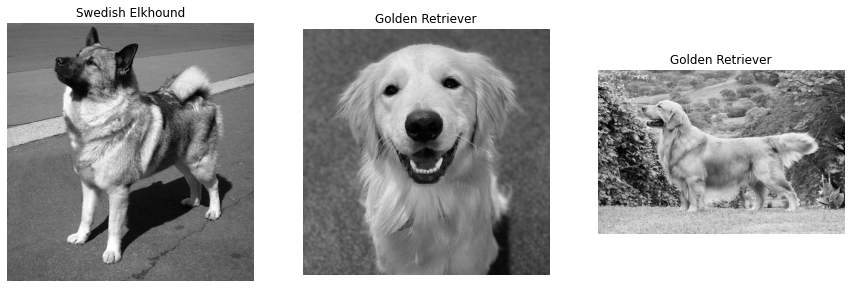

In [12]:
x_train_i, x_val_i, y_train_i, y_val_i = read_data()
visualize_data(x_train_i, y_train_i)

#### Preprocessing

In [13]:
x_train_p, x_val_p = preprocess_data(x_train_i, x_val_i)

#### Feature Extraction: Fractal Features

In [14]:
x_train_f, x_val_f = mlq.l(apply_LBP)(x_train_p, x_val_p, P=12, R=3)

#### Initiating the Model

In [15]:
model = mlq.l(svm.SVC)(kernel='linear', C=12.2, gamma=0.01, degree=3)

#### Training the model

In [16]:
model.fit(x_train_f, y_train_i)

SVC(C=12.2, gamma=0.01, kernel='linear')

#### Validate the model

In [17]:
Micro_F1 = metrics.f1_score(y_val_i, model.predict(x_val_f), average='micro').item()
mlq.log_metrics(Micro_F1)

In [18]:
mlq.end_quest()